<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/17_%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Также вы можете получить дополнительно 1 балл, если выполните все предложенные задания в задаче о Титанике (17.1), проанализируете "увеличенную модель" (17.2).

In [1]:
!wget https://storage.yandexcloud.net/academy.ai/titanic.zip
!unzip -o -q titanic.zip -d titanic

--2025-02-13 12:02:02--  https://storage.yandexcloud.net/academy.ai/titanic.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34877 (34K) [application/zip]
Saving to: ‘titanic.zip’

titanic.zip         100%[===================>]  34.06K  --.-KB/s    in 0.1s    

2025-02-13 12:02:03 (270 KB/s) - ‘titanic.zip’ saved [34877/34877]



In [3]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_train = pd.read_csv("./titanic/train.csv", engine="python")
df_test = pd.read_csv("./titanic/test.csv", engine="python")
df = pd.concat([df_train, df_test], ignore_index=True, sort = False)

In [24]:
def show_plt(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels=['died', 'survival'])
    plt.show()

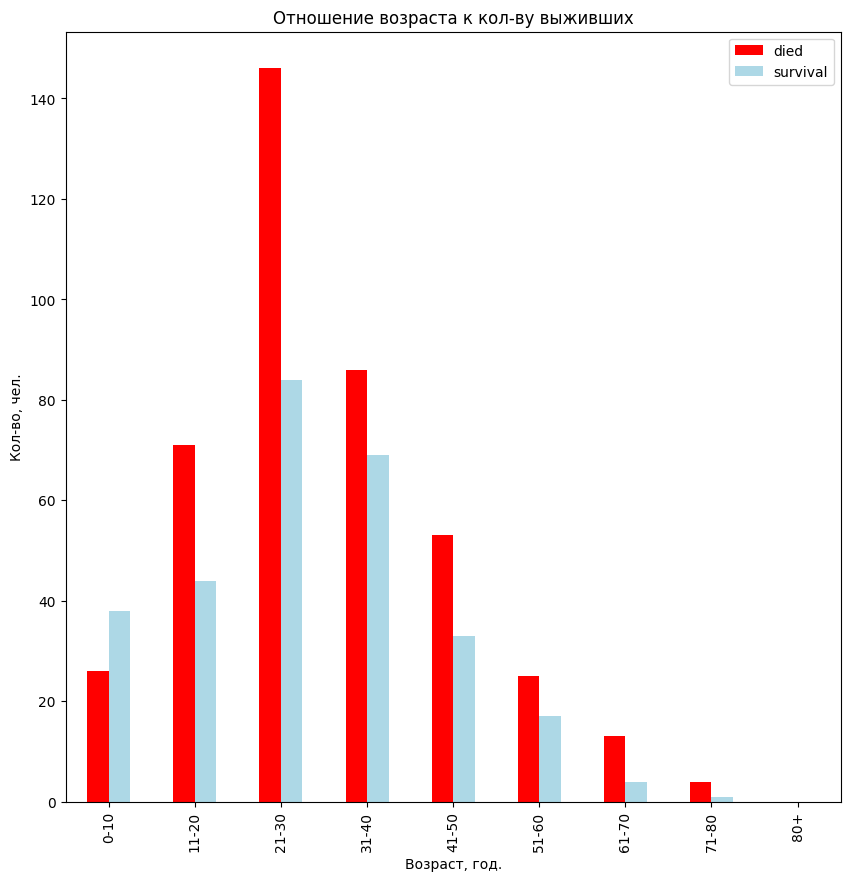

In [43]:
# Age
bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
result_1 = df.groupby(['Age_Group', 'Survived'], observed=False).size().unstack(fill_value=0)
result_1.plot(kind='bar', figsize=(10, 10), color=['red', 'lightblue'])
show_plt('Отношение возраста к кол-ву выживших', 'Возраст, год.', 'Кол-во, чел.')

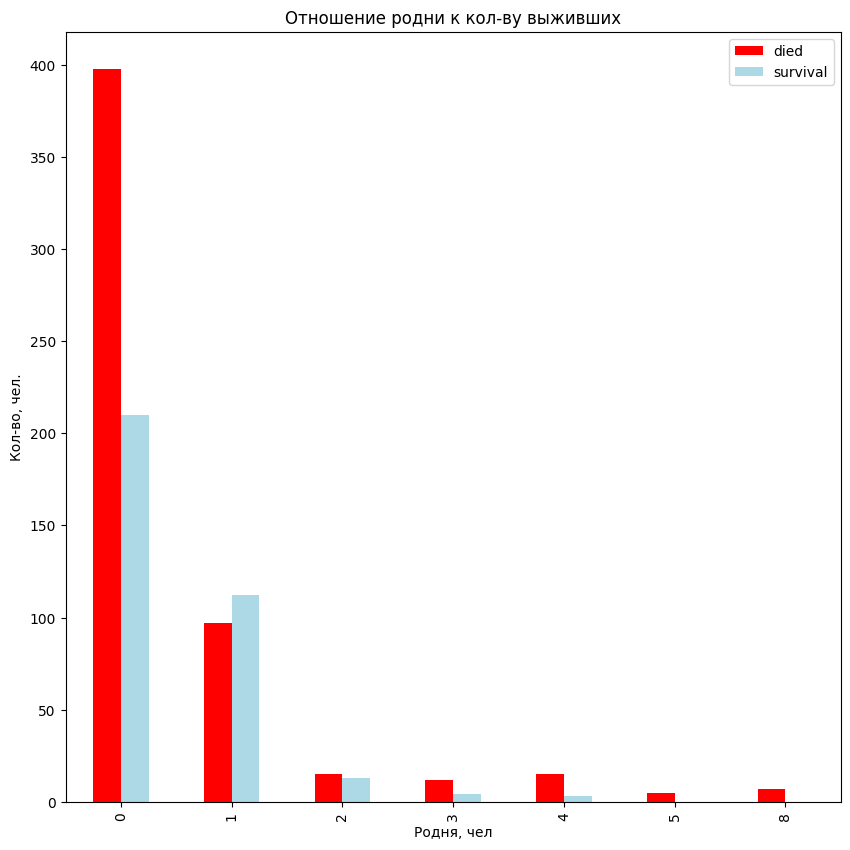

In [47]:
# SibSp
result_2 = df.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
result_2.plot(kind='bar', figsize=(10, 10), color=['red', 'lightblue'])
show_plt('Отношение родни к кол-ву выживших', 'Родня, чел', 'Кол-во, чел.')

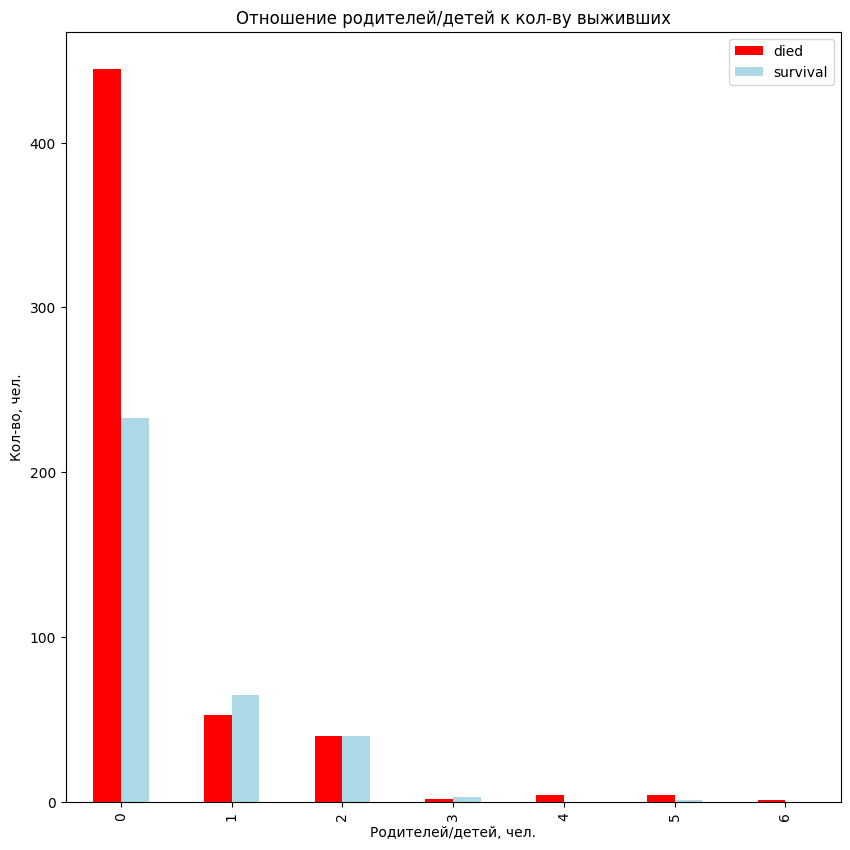

In [44]:
# Parch
result_3 = df.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)
result_3.plot(kind='bar', figsize=(10, 10), color=['red', 'lightblue'])
show_plt('Отношение родителей/детей к кол-ву выживших', 'Родителей/детей, чел.', 'Кол-во, чел.')

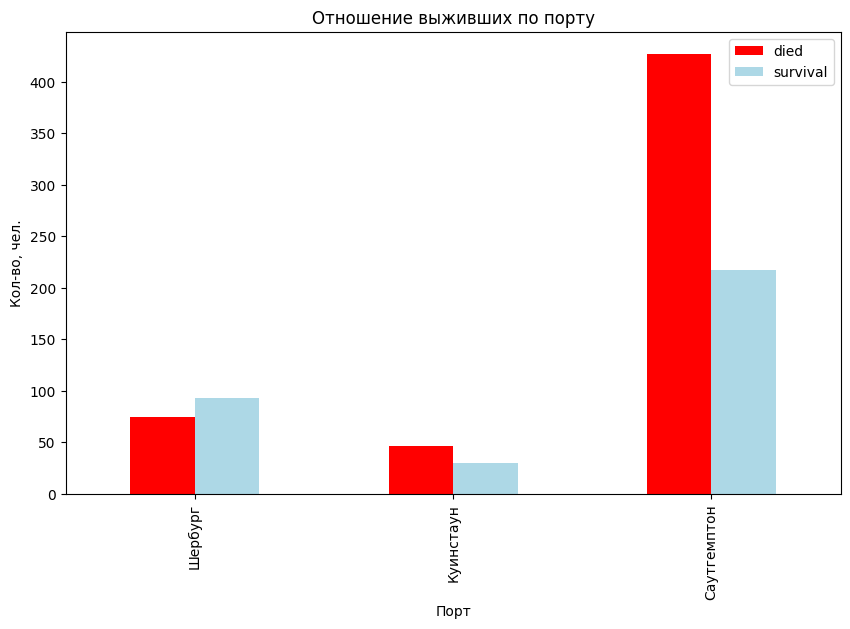

In [45]:
# Embarked
result_4 = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
labels = {'S': 'Саутгемптон', 'C': 'Шербург', 'Q': 'Куинстаун'}
result_4.rename(index=labels).plot(kind='bar', figsize=(10, 6), color=['red', 'lightblue'])
show_plt('Отношение выживших по порту', 'Порт', 'Кол-во, чел.')

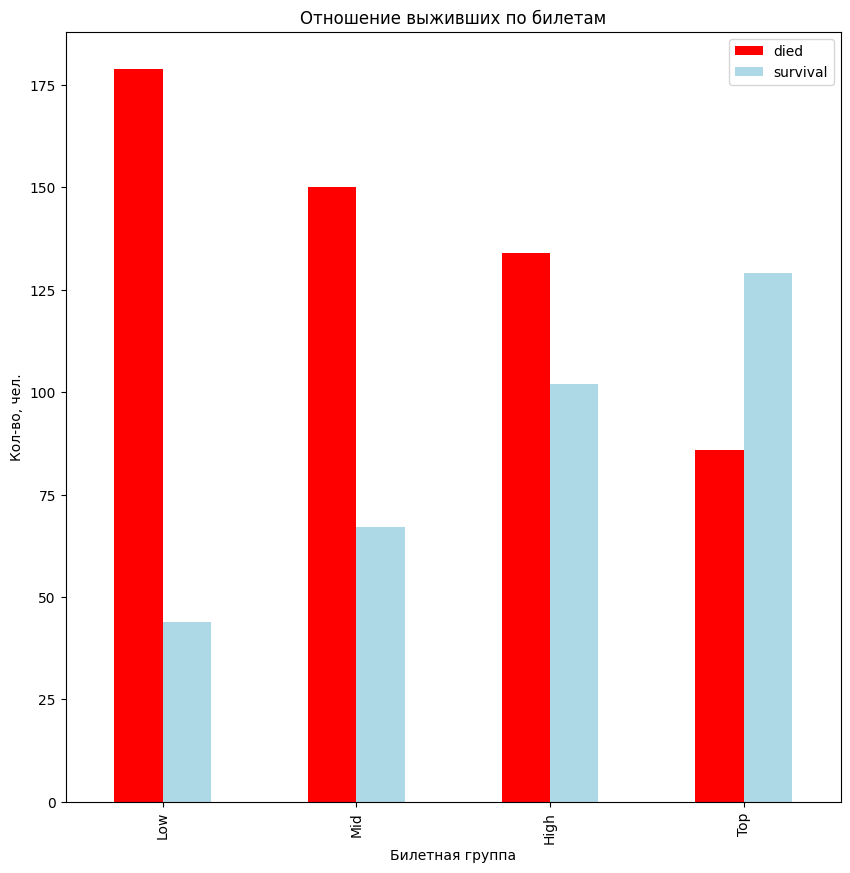

In [46]:
# Ticket
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0, 7.9, 14.45, 31.28, 512.4], include_lowest=True, labels=['Low','Mid', 'High','Top'])
result_5 = df.groupby(['Fare_Category', 'Survived'], observed=False).size().unstack(fill_value=0)
result_5.plot(kind='bar', figsize=(10, 10), color=['red', 'lightblue'])
show_plt('Отношение выживших по билетам', 'Билетная группа', 'Кол-во, чел.')

In [51]:
# Увеличенная  модель
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Создаем нулевой вектор с размерностью 10000!
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Записываем единицы в элемент с данным индексом
    return results

x_train = vectorize_sequences(train_data) # Векторизуем обучающие данные
x_test  = vectorize_sequences(test_data)  # Векторизуем контрольные данные

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

EPOCHS = 10
BATCH_SIZE = 256
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
epochs = range(1, len(history_dict['loss'])+1)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6239 - loss: 0.6307 - val_accuracy: 0.8824 - val_loss: 0.3251
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8788 - loss: 0.3312 - val_accuracy: 0.8944 - val_loss: 0.2643
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9188 - loss: 0.2306 - val_accuracy: 0.8956 - val_loss: 0.2749
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9369 - loss: 0.1799 - val_accuracy: 0.8984 - val_loss: 0.2945
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9536 - loss: 0.1411 - val_accuracy: 0.8920 - val_loss: 0.3137
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9584 - loss: 0.1230 - val_accuracy: 0.8884 - val_loss: 0.3426
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9640 - loss: 0.1043 - val_accuracy: 0.8892 - val_loss: 0.3568
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9707 - loss: 0.0901 - val_accuracy: 0.8880 - v

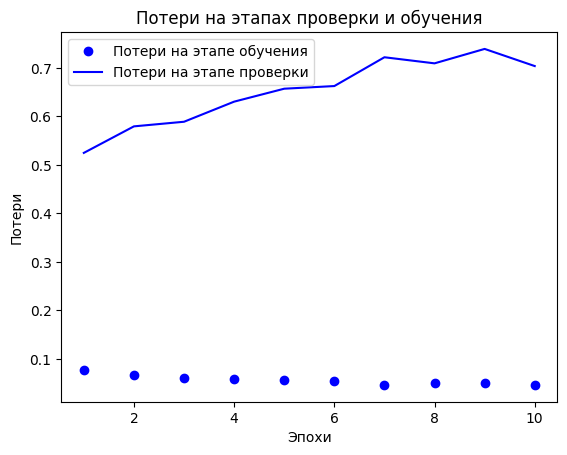

In [52]:
plt.plot(epochs, history_dict['loss'], 'bo', label='Потери на этапе обучения')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Потери на этапе проверки')
plt.title('Потери на этапах проверки и обучения')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

Я очень много раз возвращался к этой домашке, но так и не смог добиться приемлимого качества. Мне не помогли:

- L1 регуляризация
- L2 регуляризация
- Dropout
- Batchnormalization

Я эксерементировал и с архитектурой и с ёмкостью сети. И менял эпохи, размер батча и все что можно)